In [1]:
# Import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

Data Generation
===

In [2]:
np.random.seed(10)
P, Q = (np.random.rand(i, 2) for i in (4, 5))
P_big, Q_big = (np.random.rand(i, 80) for i in (100, 120))

print(P, "\n\n", Q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [3]:
def naive(P, Q):
    """
    A naive solution for finding pairvise distances between poins in P and Q

    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p, q)
    """
    p, q = P.shape[0], Q.shape[0]
    D = np.zeros((p, q))
    for i in range(p):
        for j in range(q):
            D[i, j] = np.linalg.norm(P[i] - Q[j])
    return D

In [4]:
naive(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))

array([[2.82842712, 5.65685425]])

In [5]:
naive(P, Q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

In [6]:
test(naive)

Could not find any tests for naive


In [60]:
def naive2(P, Q):
    """
    A naive solution for finding pairvise distances between poins in P and Q

    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p, q)
    """
    p, q = P.shape[0], Q.shape[0]
    D = np.zeros((p, q))
    for i in range(p):
        D[i] = np.linalg.norm(Q - P[i], axis=1)
    return D

In [61]:
naive2(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))

array([[2.82842712, 5.65685425]])

In [62]:
naive2(P, Q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

In [64]:
test(naive2)

Could not find any tests for naive2


### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [16]:
p, q = P.shape[0], Q.shape[0]
rows, cols = np.indices((p, q))
print(rows, end="\n\n")
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [17]:
print(P[rows.ravel()], end="\n\n")
print(Q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [80]:
def with_indices(P, Q):
    """
    An optimized solution using matching indices

    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p, q)
    """
    p, q = P.shape[0], Q.shape[0]
    rows, cols = np.indices((p, q))
    # return np.sqrt(np.sum((P[rows.ravel()] - Q[cols.ravel()])**2, axis=1)).reshape(p, q)
    return np.linalg.norm(P[rows.ravel()] - Q[cols.ravel()], axis=1).reshape(p, q)

In [55]:
with_indices(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))

array([[2.82842712, 5.65685425]])

In [77]:
with_indices(P, Q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

In [81]:
test(with_indices)

Could not find any tests for with_indices


In [54]:
def with_indices2(P, Q):
    """
    An optimized solution using matching indices

    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p, q)
    """
    p, q = P.shape[0], Q.shape[0]
    rows, cols = np.indices((p, q))
    return np.linalg.norm(P[rows] - Q[cols], axis=2)

In [58]:
with_indices2(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))

array([[2.82842712, 5.65685425]])

In [66]:
with_indices2(P, Q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

In [59]:
test(with_indices2)

Could not find any tests for with_indices2


### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [45]:
from scipy.spatial.distance import cdist

def scipy_version(P, Q):
    """
    A solution using scipy

    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)

    Returns:
        D: numpy array of shape=(p, q)
    """
    return cdist(P, Q)

In [46]:
scipy_version(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))

array([[2.82842712, 5.65685425]])

In [67]:
scipy_version(P, Q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

In [47]:
test(scipy_version)

Could not find any tests for scipy_version


### Numpy Magic

In [50]:
def tensor_broadcasting(P, Q):
    """
    A solution using tensor broadcasting

    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)

    Returns:
        D: numpy array of shape=(p, q)
    """
    return np.sqrt(np.sum((P[:, np.newaxis, :] - Q[np.newaxis, :, :]) ** 2, axis=2))

In [51]:
tensor_broadcasting(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))

array([[2.82842712, 5.65685425]])

In [68]:
tensor_broadcasting(P, Q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

In [53]:
test(tensor_broadcasting)

Could not find any tests for tensor_broadcasting


# Compare methods

In [78]:
methods = [
    naive,
    naive2,
    with_indices,
    with_indices2,
    scipy_version,
    tensor_broadcasting,
]
timers = []
for f in methods:
    r = %timeit -o f(P_big, Q_big)
    timers.append(r)

45.7 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.35 ms ± 90.6 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.7 ms ± 361 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13 ms ± 497 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
549 μs ± 31.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
6.82 ms ± 749 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


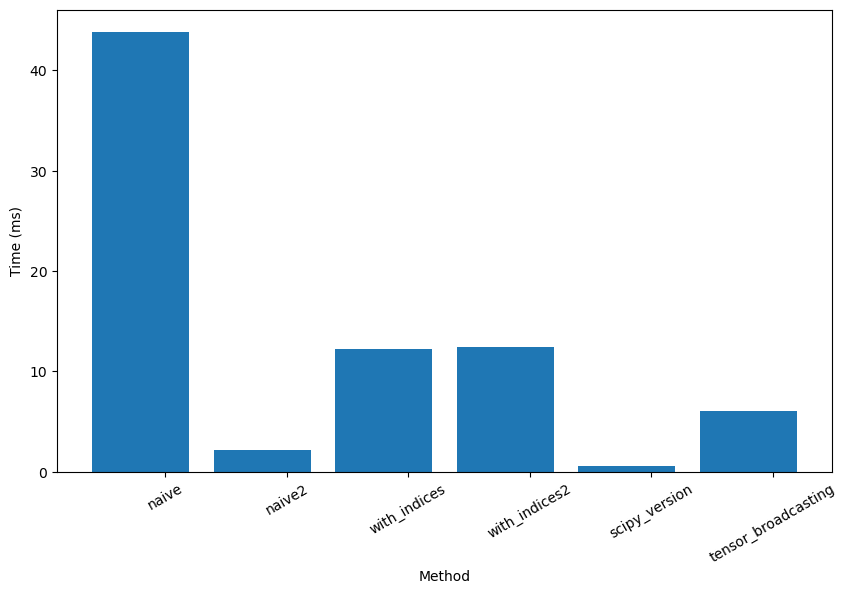

In [79]:
plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(len(methods)), [r.best * 1000 for r in timers], log=False
)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods)) + 0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel("Method")
plt.ylabel("Time (ms)")
plt.show()